In [3]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from six.moves import range

# Setup Pandas
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

In [4]:
critics = pd.read_csv('./critics.csv')
#let's drop rows with missing quotes
critics = critics[~critics.quote.isnull()]
critics.head()

,critic,fresh,imdb,publication,quote,review_date,rtid,title
1,Derek Adams,fresh,114709,Time Out,"So ingenious in concept, design and execution ...",2009-10-04,9559,Toy story
2,Richard Corliss,fresh,114709,TIME Magazine,The year's most inventive comedy.,2008-08-31,9559,Toy story
3,David Ansen,fresh,114709,Newsweek,A winning animated feature that has something ...,2008-08-18,9559,Toy story
4,Leonard Klady,fresh,114709,Variety,The film sports a provocative and appealing st...,2008-06-09,9559,Toy story
5,Jonathan Rosenbaum,fresh,114709,Chicago Reader,"An entertaining computer-generated, hyperreali...",2008-03-10,9559,Toy story


In [10]:
from sklearn.feature_extraction.text import CountVectorizer


def make_xy(critics, vectorizer=None):
    #Your code here    
    if vectorizer is None:
        vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(critics.quote)
    X = X.tocsc()  # some versions of sklearn return COO format
    y = (critics.fresh == 'fresh').values.astype(np.int)
    return X, y
X, y = make_xy(critics)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

#your turn
#critics.info()
#critics.head(100)
#MultinomialNB?

x, y = make_xy(critics)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state = 42)

MNB = MultinomialNB(alpha = 1)

MNB.fit(X_train, y_train)

print(MNB.score(X_train, y_train))
print(MNB.score(X_test, y_test))

0.923338229893
0.778325123153


In [13]:
from sklearn.feature_extraction.text import CountVectorizer

text = ['This movie is not remarkable, touching, or superb in any way']


text = vectorizer.transform(text)

vectorizer.get_feature_names()

MNB.predict(text)

NameError: name 'vectorizer' is not defined

In [14]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(critics.quote)
X = X.tocsc()  # some versions of sklearn return COO format
Y = (critics.fresh == 'fresh').values.astype(np.int)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .3, random_state = 42)

MNB = MultinomialNB(alpha = 1)

MNB.fit(X_train, y_train)

print(MNB.score(X_train, y_train))
print(MNB.score(X_test, y_test))

text = ['This movie is not remarkable, touching, or superb in any way']
txt = vectorizer.transform(text)

txt

print(MNB.predict(txt))

0.923338229893
0.778325123153
[1]


In [15]:
clf = RandomForestClassifier(n_jobs=2)


NameError: name 'RandomForestClassifier' is not defined

In [16]:
import scrapy
from scrapy.spiders import CrawlSpider, Rule
from scrapy.linkextractors import LinkExtractor

from imdbyear.items import MovieItem

class IMDBSpider(CrawlSpider):
    name = 'imdb'
    rules = (
        # extract links at the bottom of the page. note that there are 'Prev' and 'Next'
        # links, so a bit of additional filtering is needed
        Rule(LinkExtractor(restrict_xpaths=('//*[@id="right"]/span/a')),
            process_links=lambda links: filter(lambda l: 'Next' in l.text, links),
            callback='parse_page',
            follow=True),
    )

    def __init__(self, start=None, end=None, *args, **kwargs):
      super(IMDBSpider, self).__init__(*args, **kwargs)
      self.start_year = int(start) if start else 1874
      self.end_year = int(end) if end else 2016

    # generate start_urls dynamically
    def start_requests(self):
        for year in range(self.start_year, self.end_year+1):
            yield scrapy.Request('http://www.imdb.com/search/title?year=%d,%d&title_type=feature&sort=moviemeter,asc' % (year, year))

    def parse_page(self, response):
        for sel in response.xpath("//*[@class='results']/tr/td[3]"):
            item = MovieItem()
            item['Title'] = sel.xpath('a/text()').extract()[0]
            # note -- you had 'MianPageUrl' as your scrapy field name. I would recommend fixing this typo
            # (you will need to change it in items.py as well)
            item['MainPageUrl']= "http://imdb.com"+sel.xpath('a/@href').extract()[0]
            request = scrapy.Request(item['MainPageUrl'], callback=self.parseMovieDetails)
            request.meta['item'] = item
            yield request
    # make sure that the dynamically generated start_urls are parsed as well
    parse_start_url = parse_page

    # do your magic
    def parseMovieDetails(self, response):
        pass

ModuleNotFoundError: No module named 'imdbyear'

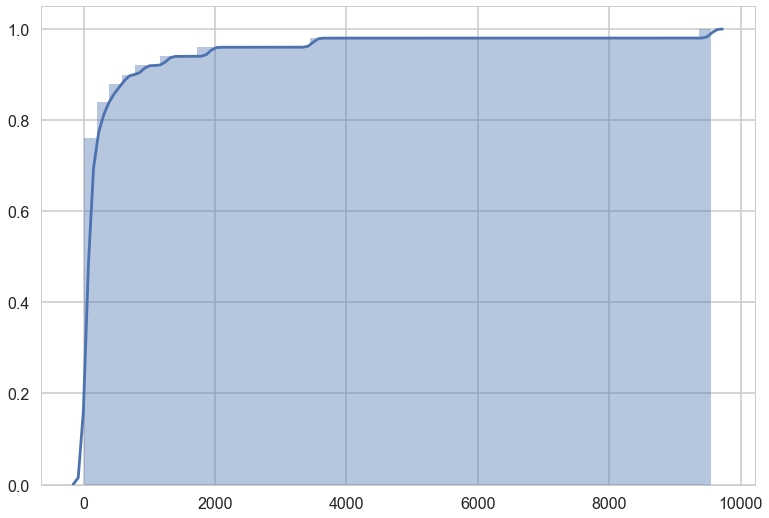

In [17]:
#print (X.shape)
dist = X.sum(axis=0)
#print dist.shape
dist = dist.transpose()
#print(dist)
doc_df = pd.DataFrame(data=dist)
#print(doc_df.head(10))
#print(doc_df.info())
#print doc_df.head(10)
doc_gb = doc_df.groupby(0).size()
#print (doc_gb.head(50))
#print(len(doc_gb))
sns.distplot(doc_gb.head(50), hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))

In [18]:
def find_ngrams(input_list, n):
  return zip(*[input_list[i:] for i in range(n)])

In [19]:
import string

quotes = critics.quote
freshness = critics.fresh
grams = []
f = []

for quote, fresh in zip(quotes[0:10],freshness[0:10]):
    #print(quote)
    #print(fresh)
    # Take out punctuation
    x = [''.join(c for c in str(quote) if c not in string.punctuation)]
    #print(x)
    
    # Change to string
    x = str(x)
    #print(x)
    
    # String brack and apostrophe
    x = x.strip("[']")
    #print(x)
    
    # Split string into list of words
    x = x.split()
    #print(x)
    
    # Convert list of words to zip object of ngrams
    x = find_ngrams(x, 2)
    #print(x)
    
    # Convert zip object to list of ngrams
    j = []
    
    for a, b in x:
        #print(a, b)
        temp = a+' '+b
        #print(temp)
        j.append(temp)
    
    if(fresh == 'fresh'):
        f.append(1)
    else:
        f.append(0)
    
    grams.append(j)
    #print(j) 

print(f)
print(grams)    

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[['So ingenious', 'ingenious in', 'in concept', 'concept design', 'design and', 'and execution', 'execution that', 'that you', 'you could', 'could watch', 'watch it', 'it on', 'on a', 'a postage', 'postage stampsized', 'stampsized screen', 'screen and', 'and still', 'still be', 'be engulfed', 'engulfed by', 'by its', 'its charm'], ['The years', 'years most', 'most inventive', 'inventive comedy'], ['A winning', 'winning animated', 'animated feature', 'feature that', 'that has', 'has something', 'something for', 'for everyone', 'everyone on', 'on the', 'the age', 'age spectrum'], ['The film', 'film sports', 'sports a', 'a provocative', 'provocative and', 'and appealing', 'appealing story', 'story thats', 'thats every', 'every bit', 'bit the', 'the equal', 'equal of', 'of this', 'this technical', 'technical achievement'], ['An entertaining', 'entertaining computergenerated', 'computergenerated hyperrealist', 'hyperrealist animation', 'animation feature', 'fe

In [20]:
from requests import get
from bs4 import BeautifulSoup

url = 'http://www.imdb.com/title/tt0114709/?ref_=nv_sr_1'
response = get(url)
print(response.text[:500])
    
soup = BeautifulSoup(response.text, 
                    'html.parser')
type(soup)









<!DOCTYPE html>
<html
xmlns:og="http://ogp.me/ns#"
xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///title/tt0114709?src=mdot">
            <script type="text/javascript">var ue_t0=window.ue_t0||+new Date();</script>
            <script type="text/javascript">
                var ue_mid = "A1EVAM02EL8SFB"; 



bs4.BeautifulSoup

In [21]:
movie_containers = soup.find_all('div', class_ = 'lister-item mode-advanced')
print(type(movie_containers))
print(len(movie_containers))

<class 'bs4.element.ResultSet'>
0


In [22]:
from imdb import IMDb
ia = IMDb()

In [23]:
toy_story = ia.get_movie('114709')

In [24]:
print(type(toy_story))
print(toy_story)

<class 'imdb.Movie.Movie'>
Toy Story


In [25]:
toy_story.keys()

['title',
 'year',
 'kind',
 'genres',
 'runtimes',
 'countries',
 'country codes',
 'language codes',
 'color info',
 'aspect ratio',
 'sound mix',
 'certificates',
 'original air date',
 'rating',
 'votes',
 'cover url',
 'plot outline',
 'languages',
 'akas',
 'writer',
 'director',
 'top 250 rank',
 'plot',
 'canonical title',
 'long imdb title',
 'long imdb canonical title',
 'smart canonical title',
 'smart long imdb canonical title',
 'full-size cover url']

In [26]:
print(toy_story)
print(ia.get_movie_infoset())

for item in ia.get_movie_infoset():
    if item in toy_story:
        print(toy_story[item])

Toy Story
['airing', 'akas', 'alternate versions', 'awards', 'business', 'connections', 'crazy credits', 'critic reviews', 'episodes', 'episodes cast', 'episodes rating', 'external reviews', 'external sites', 'faqs', 'full credits', 'goofs', 'guests', 'keywords', 'literature', 'locations', 'main', 'misc sites', 'news', 'official sites', 'parents guide', 'photo sites', 'plot', 'quotes', 'recommendations', 'release dates', 'release info', 'reviews', 'sound clips', 'soundtrack', 'synopsis', 'taglines', 'technical', 'trivia', 'tv schedule', 'video clips', 'vote details']


In [27]:
help(toy_story)

Help on Movie in module imdb.Movie object:

class Movie(imdb.utils._Container)
 |  A Movie.
 |  
 |  Every information about a movie can be accessed as:
 |      movieObject['information']
 |  to get a list of the kind of information stored in a
 |  Movie object, use the keys() method; some useful aliases
 |  are defined (as "casting" for the "casting director" key); see
 |  the keys_alias dictionary.
 |  
 |  Method resolution order:
 |      Movie
 |      imdb.utils._Container
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __bool__(self)
 |      The Movie is "false" if the self.data does not contain a title.
 |  
 |  __contains__(self, item)
 |      Return true if the given Person object is listed in this Movie,
 |      or if the the given Character is represented in this Movie.
 |  
 |  __deepcopy__(self, memo)
 |      Return a deep copy of a Movie instance.
 |  
 |  __repr__(self)
 |      String representation of a Movie object.
 |  
 |  __str__(self)
 |      Simply 

In [28]:
for item in toy_story.keys():
    print(item)

title
year
kind
genres
runtimes
countries
country codes
language codes
color info
aspect ratio
sound mix
certificates
original air date
rating
votes
cover url
plot outline
languages
akas
writer
director
top 250 rank
plot
canonical title
long imdb title
long imdb canonical title
smart canonical title
smart long imdb canonical title
full-size cover url


In [29]:
from requests import get
from bs4 import BeautifulSoup

url = 'http://www.imdb.com/title/tt0114709/'
response = get(url)
    
soup = BeautifulSoup(response.text, 
                    'html.parser')

type(soup)
print(soup.prettify())

soup.find_all(span_ ='"itemprop" itemprop="name"')

print(soup(itemprop="name"))

soup.find('span')

movie_containers = soup.find_all('div')

genre = soup.find_all(class_ = "itemprop", itemprop = "genre")
genres = []
for e in genre: 
    genres.append(e.get_text())

print(genres)

actor = soup.find_all(itemprop = "actor")
actors = []
for e in actor: 
    actors.append(e.get_text().replace('\n','').strip())
      
print(actors)

director = soup.find_all(itemprop = "director")
directors = []
for e in director: 
    directors.append(e.get_text().replace('\n','').strip())
    
print(directors)

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="app-id=342792525, app-argument=imdb:///title/tt0114709?src=mdot" name="apple-itunes-app"/>
  <script type="text/javascript">
   var ue_t0=window.ue_t0||+new Date();
  </script>
  <script type="text/javascript">
   var ue_mid = "A1EVAM02EL8SFB"; 
                var ue_sn = "www.imdb.com";  
                var ue_furl = "fls-na.amazon.com";
                var ue_sid = "000-0000000-0000000";
                var ue_id = "0V1TDP26JRJ0RJHANBVT";
                (function(e){var c=e;var a=c.ue||{};a.main_scope="mainscopecsm";a.q=[];a.t0=c.ue_t0||+new Date();a.d=g;function g(h){return +new Date()-(h?0:a.t0)}function d(h){return function(){a.q.push({n:h,a:arguments,t:a.d()})}}function b(m,l,h,j,i){var k={m:m,f:l,l:h,c:""+j,err:i,fromOnError:1,args:arguments};c.ueLogError(k);return false}b.s

In [30]:
for title in critics.title:
    print(title)
    
for column, value in critics.iteritems():
    print(column[value])
    
for index, row in critics.iterrows():
    print(row)
    
movie = 'Toy Story'
movie_search = '+'.join(movie.split())
base_url = 'http://www.imdb.com/find?q='
url = base_url+movie_search+'&s=all'
response = get(url)
    
soup = BeautifulSoup(response.text,'html.parser')

print(url)
type(soup)
print(soup.prettify())

Toy story
Toy story
Toy story
Toy story
Toy story
Toy story
Toy story
Toy story
Toy story
Toy story
Toy story
Toy story
Toy story
Toy story
Toy story
Toy story
Toy story
Toy story
Toy story
Jumanji
Jumanji
Grumpy Old Men
Grumpy Old Men
Grumpy Old Men
Grumpy Old Men
Grumpy Old Men
Grumpy Old Men
Waiting to Exhale
Waiting to Exhale
Waiting to Exhale
Waiting to Exhale
Waiting to Exhale
Waiting to Exhale
Waiting to Exhale
Waiting to Exhale
Waiting to Exhale
Waiting to Exhale
Father of the Bride Part II
Heat
Heat
Heat
Heat
Heat
Heat
Heat
Heat
Heat
Heat
Heat
Heat
Heat
Heat
Heat
Heat
Heat
Heat
Sabrina
Sabrina
Sabrina
Sabrina
Sabrina
Sabrina
Tom and Huck
Sudden Death
Sudden Death
Sudden Death
Sudden Death
Sudden Death
Sudden Death
Sudden Death
Sudden Death
Sudden Death
GoldenEye
GoldenEye
GoldenEye
GoldenEye
GoldenEye
GoldenEye
GoldenEye
GoldenEye
GoldenEye
GoldenEye
GoldenEye
GoldenEye
GoldenEye
GoldenEye
The American President
The American President
The American President
The American Presid

The Glass Shield
The Glass Shield
The Glass Shield
The Glass Shield
The Glass Shield
The Glass Shield
Hoop Dreams
Hoop Dreams
Hoop Dreams
Hoop Dreams
Hoop Dreams
Hoop Dreams
Hoop Dreams
Hoop Dreams
Hoop Dreams
Hoop Dreams
Hoop Dreams
Hoop Dreams
Heavenly Creatures
Heavenly Creatures
Heavenly Creatures
Heavenly Creatures
Heavenly Creatures
Heavenly Creatures
Heavenly Creatures
Heavenly Creatures
Heavenly Creatures
Heavenly Creatures
Heavenly Creatures
Houseguest
Houseguest
Houseguest
Houseguest
The Hunted
The Hunted
The Hunted
The Hunted
The Hunted
The Hunted
The Hunted
The Hunted
The Hunted
The Hunted
The Hunted
The Hunted
The Hunted
The Hunted
The Hunted
The Hunted
Interview with the Vampire: The Vampire Chronicles
Interview with the Vampire: The Vampire Chronicles
Interview with the Vampire: The Vampire Chronicles
Interview with the Vampire: The Vampire Chronicles
Interview with the Vampire: The Vampire Chronicles
Interview with the Vampire: The Vampire Chronicles
Interview with the 

True Romance
True Romance
True Romance
True Romance
True Romance
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb
The Pagemaster
The Pagemaster
The Pagemaster
The Pagemaster
The Pagemaster
The Pagemaster
The Pagemaster
2 Days in Paris
2 Days in Paris
2 Days in Paris
2 Days in Paris
2 Days in Paris
2 Days in Paris
2 Days in Paris
2 Days in Paris
2 Days in Paris
2 Days in Paris
2 Days in Paris
2 Days in Paris
2 Days in Paris
2

The Manchurian Candidate
The Manchurian Candidate
The Manchurian Candidate
The Manchurian Candidate
The Manchurian Candidate
The Manchurian Candidate
The Manchurian Candidate
The Great Race
The Great Race
Bonnie and Clyde
Bonnie and Clyde
Bonnie and Clyde
Bonnie and Clyde
Bonnie and Clyde
Bonnie and Clyde
Bonnie and Clyde
Bonnie and Clyde
Bonnie and Clyde
Bonnie and Clyde
Dial M for Murder
Dial M for Murder
Dial M for Murder
Dial M for Murder
Dial M for Murder
Dial M for Murder
Dial M for Murder
Dirty Dancing
Dirty Dancing
Dirty Dancing
Dirty Dancing
Dirty Dancing
Dirty Dancing
Dirty Dancing
Dirty Dancing
Dirty Dancing
Dirty Dancing
Dirty Dancing
Dirty Dancing
Reservoir Dogs
Reservoir Dogs
Reservoir Dogs
Reservoir Dogs
Reservoir Dogs
Reservoir Dogs
Reservoir Dogs
Reservoir Dogs
Reservoir Dogs
Reservoir Dogs
Reservoir Dogs
Reservoir Dogs
Reservoir Dogs
Reservoir Dogs
Reservoir Dogs
Reservoir Dogs
Reservoir Dogs
Platoon
Platoon
Platoon
Platoon
Platoon
Platoon
Platoon
Platoon
Platoon
Plat

B*A*P*S
Turbo: A Power Rangers Movie
Turbo: A Power Rangers Movie
Turbo: A Power Rangers Movie
Turbo: A Power Rangers Movie
Turbo: A Power Rangers Movie
Turbo: A Power Rangers Movie
Turbo: A Power Rangers Movie
Double Team
Inventing the Abbotts
Inventing the Abbotts
Anaconda
Anaconda
Anaconda
Anaconda
Anaconda
Anaconda
Anaconda
Anaconda
Anaconda
Grosse Pointe Blank
Grosse Pointe Blank
Grosse Pointe Blank
Grosse Pointe Blank
Grosse Pointe Blank
Grosse Pointe Blank
Grosse Pointe Blank
Grosse Pointe Blank
Grosse Pointe Blank
Grosse Pointe Blank
Grosse Pointe Blank
Grosse Pointe Blank
Grosse Pointe Blank
Paradise Road
Paradise Road
Walk All Over Me
Romy and Michele's High School Reunion
Romy and Michele's High School Reunion
Romy and Michele's High School Reunion
Romy and Michele's High School Reunion
Romy and Michele's High School Reunion
Romy and Michele's High School Reunion
Romy and Michele's High School Reunion
Romy and Michele's High School Reunion
Romy and Michele's High School Reun

Dune
Dune
Dune
Dune
Dune
The Last Temptation of Christ
The Last Temptation of Christ
The Last Temptation of Christ
The Last Temptation of Christ
The Last Temptation of Christ
The Last Temptation of Christ
The Last Temptation of Christ
The Last Temptation of Christ
The Godfather: Part III
The Godfather: Part III
The Godfather: Part III
The Godfather: Part III
The Godfather: Part III
The Godfather: Part III
The Godfather: Part III
The Godfather: Part III
The Godfather: Part III
The Godfather: Part III
Lolita
Lolita
Lolita
Saving Private Ryan
Saving Private Ryan
Saving Private Ryan
Saving Private Ryan
Saving Private Ryan
Saving Private Ryan
Saving Private Ryan
Saving Private Ryan
Saving Private Ryan
Saving Private Ryan
Saving Private Ryan
Saving Private Ryan
Saving Private Ryan
Saving Private Ryan
Saving Private Ryan
Saving Private Ryan
Saving Private Ryan
Saving Private Ryan
Saving Private Ryan
Saving Private Ryan
The Barefoot Executive
The Black Cauldron
The Black Cauldron
The Black Cau

Tough Guys Don't Dance
Soul Man
Soul Man
Soul Man
Soul Man
Soul Man
Soul Man
The Color of Money
The Color of Money
The Color of Money
The Color of Money
The Color of Money
The Color of Money
The Color of Money
The Color of Money
The Color of Money
Firewalker
Firewalker
Firewalker
Firewalker
She's All That
She's All That
She's All That
She's All That
She's All That
She's All That
She's All That
She's All That
She's All That
She's All That
She's All That
Payback
Payback
Payback
Payback
Payback
Payback
Payback
Payback
Payback
Payback
Payback
20 Dates
20 Dates
20 Dates
20 Dates
20 Dates
20 Dates
20 Dates
20 Dates
20 Dates
Comedian Harmonists
Comedian Harmonists
Comedian Harmonists
Comedian Harmonists
Comedian Harmonists
Comedian Harmonists
Comedian Harmonists
Comedian Harmonists
Comedian Harmonists
Comedian Harmonists
Last Days
Last Days
Last Days
Last Days
Last Days
Last Days
Last Days
Last Days
Last Days
Last Days
Last Days
Last Days
Last Days
Last Days
Last Days
Last Days
Last Days
La p

Superstar
Boys Don't Cry
Boys Don't Cry
Boys Don't Cry
Boys Don't Cry
Boys Don't Cry
Boys Don't Cry
Boys Don't Cry
Boys Don't Cry
Boys Don't Cry
Boys Don't Cry
Boys Don't Cry
El abuelo
El abuelo
El abuelo
The Limey
The Limey
The Limey
The Limey
The Limey
The Limey
The Limey
The Limey
The Limey
The Limey
The Limey
The Limey
The Limey
The Limey
The Limey
The Limey
The Limey
The Haunting of Molly Hartley
The Haunting of Molly Hartley
The Haunting of Molly Hartley
The Haunting of Molly Hartley
The Haunting of Molly Hartley
The Haunting of Molly Hartley
The Haunting of Molly Hartley
The Haunting of Molly Hartley
Risky Business
Risky Business
Risky Business
Risky Business
Risky Business
Risky Business
Risky Business
Total Recall
Total Recall
Total Recall
Total Recall
Total Recall
Total Recall
Total Recall
Total Recall
Total Recall
Total Recall
Body Heat
Body Heat
Body Heat
Body Heat
Body Heat
Ferris Bueller's Day Off
Ferris Bueller's Day Off
Ferris Bueller's Day Off
Ferris Bueller's Day Off


Scream 3
Scream 3
Scream 3
Scream 3
Scream 3
Scream 3
Scream 3
Scream 3
Scream 3
Scream 3
Single White Female
Single White Female
Single White Female
Single White Female
Single White Female
Single White Female
Single White Female
Single White Female
The Boondock Saints
Gun Shy
Gun Shy
Gun Shy
Gun Shy
Gun Shy
Gun Shy
Gun Shy
Gun Shy
Gone Baby Gone
Gone Baby Gone
Gone Baby Gone
Gone Baby Gone
Gone Baby Gone
Gone Baby Gone
Gone Baby Gone
Gone Baby Gone
Gone Baby Gone
Gone Baby Gone
Gone Baby Gone
Gone Baby Gone
Gone Baby Gone
Gone Baby Gone
Gone Baby Gone
Gone Baby Gone
Gone Baby Gone
Gone Baby Gone
Different for Girls
Different for Girls
Different for Girls
Different for Girls
Different for Girls
Different for Girls
Different for Girls
Different for Girls
Different for Girls
Minnie and Moskowitz
Minnie and Moskowitz
The Beach
The Beach
The Beach
The Beach
The Beach
The Beach
The Beach
The Beach
The Beach
The Beach
The Beach
The Beach
The Beach
The Beach
The Beach
Snow Day
Snow Day
Snow D

TypeError: string indices must be integers